<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Quick-Dogs-vs-Cats" data-toc-modified-id="Quick-Dogs-vs-Cats-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quick Dogs vs Cats</a></span><ul class="toc-item"><li><span><a href="#Download-and-organize-the-data" data-toc-modified-id="Download-and-organize-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Download and organize the data</a></span></li></ul></li></ul></div>

# Quick Dogs vs Cats

## Download and organize the data

In [1]:
from fastai.conv_learner import *   #this one imports everything
PATH= "data/dogscats"
sz=224; bs=64
arch=resnet50   # using it in order to later compare with Keras implementation

In [2]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data)  #, precompute=True  NOT needed as it just make for faster performance by caching
%time learn.fit(1e-2, 3, cycle_len=1)

A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                     
    0      0.04602    0.024598   0.9915    
    1      0.033046   0.024332   0.9895                       
    2      0.038368   0.023929   0.99                         

CPU times: user 14min 59s, sys: 2min 2s, total: 17min 1s
Wall time: 4min 33s


[array([ 0.02393]), 0.98999999999999999]

In [3]:
learn.unfreeze()
learn.bn_freeze(True)  # prevent Batchnorm?
%time learn.fit([1e-5,1e-4,1e-2], 1, cycle_len=1)

A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                     
    0      0.021716   0.023947   0.9915    

CPU times: user 6min 9s, sys: 1min 26s, total: 7min 36s
Wall time: 3min 35s


[array([ 0.02395]), 0.99150000000000005]

In [4]:
%time log_preds, y = learn.TTA()

CPU times: user 1min 47s, sys: 13 s, total: 2min
Wall time: 27.9 s


In [5]:
preds = np.mean(np.exp(log_preds),0)  # for all (total 5) images produced by TTA
metrics.log_loss(y, np.exp(preds)), accuracy_np(preds, y)

(0.69314718246459961, 0.99299999999999999)

[[991   9]
 [  5 995]]


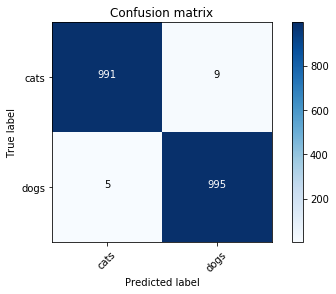

In [14]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from fastai.plots import plot_confusion_matrix
probs = np.mean(np.exp(log_preds),0)
#probs = probs[:,1]
preds = np.argmax(probs, axis=1)
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

END